In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
scaler = StandardScaler()

In [ ]:
dataset = pd.read_csv("c_dataset.csv",dtype='unicode')
dataset

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0,0,0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0,0,0,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0,0,0,missing,2536,missing,missing,...,0,missing,29.29,0,1,1,na,0,C,1
3,230035,1739,0.2193,0,0,0,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0,0,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,310027,1736,2.174,0,0,0,11,4248,1577,13379,...,0,missing,78.378,0,4,0.43829,na,0,C,0
79996,310028,1724,0,1.108,0.768,0,missing,64041,missing,10926,...,0,missing,38.325,0.16667,14,0.57931,0,0,C,0
79997,310029,1605,0.2901,11.561,0.937,2.976,missing,2277,missing,3964,...,2,101.85,93.142,0.5,4,0.42069,na,0,C,1
79998,310030,1780,1.1874,0,0,0,0,6356,4802,3206,...,0,missing,77.022,0.06061,9,0.53251,na,0,L,0


In [ ]:
dataset.replace({'missing': np.NaN, 'na': np.NaN}, regex=True, inplace=True)
dataset

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0,0,0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,NaN,0,C,0
1,230033,1846,0.8095,0,0,0,102,7532,3171,18234,...,0,99.129,NaN,0,13,0.63836,NaN,NaN,L,1
2,230034,1745,0.4001,0,0,0,NaN,2536,NaN,NaN,...,0,NaN,29.29,0,1,1,NaN,0,C,1
3,230035,1739,0.2193,0,0,0,1982,26440,4955,20316,...,0,96.272,NaN,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0,0,5451,5494,5494,7987,...,0,115.019,NaN,0,1,0.92665,NaN,NaN,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,310027,1736,2.174,0,0,0,11,4248,1577,13379,...,0,NaN,78.378,0,4,0.43829,NaN,0,C,0
79996,310028,1724,0,1.108,0.768,0,NaN,64041,NaN,10926,...,0,NaN,38.325,0.16667,14,0.57931,0,0,C,0
79997,310029,1605,0.2901,11.561,0.937,2.976,NaN,2277,NaN,3964,...,2,101.85,93.142,0.5,4,0.42069,NaN,0,C,1
79998,310030,1780,1.1874,0,0,0,0,6356,4802,3206,...,0,NaN,77.022,0.06061,9,0.53251,NaN,0,L,0


In [ ]:
dataset.isnull().sum()

application_key        0
mvar1               3639
mvar2               5553
mvar3                501
mvar4                501
mvar5                501
mvar6              18964
mvar7               7394
mvar8              18964
mvar9              11408
mvar10               502
mvar11             44819
mvar12             14078
mvar13              8352
mvar14                 0
mvar15             32067
mvar16             18510
mvar17             15846
mvar18             14771
mvar19                 4
mvar20               502
mvar21             22561
mvar22             29124
mvar23             40248
mvar24             18902
mvar25              7706
mvar26             10610
mvar27             13209
mvar28               502
mvar29               502
mvar30             36417
mvar31             56218
mvar32              7706
mvar33              1751
mvar34               502
mvar35             33014
mvar36              2898
mvar37              7706
mvar38               502
mvar39              6040


In [ ]:
s

In [ ]:
dataset.isnull().sum()


application_key    0
mvar1              0
mvar2              0
mvar3              0
mvar4              0
mvar5              0
mvar6              0
mvar7              0
mvar8              0
mvar9              0
mvar10             0
mvar11             0
mvar12             0
mvar13             0
mvar14             0
mvar15             0
mvar16             0
mvar17             0
mvar18             0
mvar19             0
mvar20             0
mvar21             0
mvar22             0
mvar23             0
mvar24             0
mvar25             0
mvar26             0
mvar27             0
mvar28             0
mvar29             0
mvar30             0
mvar31             0
mvar32             0
mvar33             0
mvar34             0
mvar35             0
mvar36             0
mvar37             0
mvar38             0
mvar39             0
mvar40             0
mvar41             0
mvar42             0
mvar43             0
mvar44             0
mvar45             0
mvar46             0
mvar47       

In [ ]:
dataset

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0,0,0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,0.0,0,C,0
1,230033,1846,0.8095,0,0,0,102,7532,3171,18234,...,0,99.129,78.8835,0,13,0.63836,0.0,0.0,L,1
2,230034,1745,0.4001,0,0,0,297.0,2536,2478.0,14171.0,...,0,100.0,29.29,0,1,1,0.0,0,C,1
3,230035,1739,0.2193,0,0,0,1982,26440,4955,20316,...,0,96.272,78.8835,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0,0,5451,5494,5494,7987,...,0,115.019,78.8835,0,1,0.92665,0.0,0.0,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,310027,1736,2.174,0,0,0,11,4248,1577,13379,...,0,100.0,78.378,0,4,0.43829,0.0,0,C,0
79996,310028,1724,0,1.108,0.768,0,297.0,64041,2478.0,10926,...,0,100.0,38.325,0.16667,14,0.57931,0,0,C,0
79997,310029,1605,0.2901,11.561,0.937,2.976,297.0,2277,2478.0,3964,...,2,101.85,93.142,0.5,4,0.42069,0.0,0,C,1
79998,310030,1780,1.1874,0,0,0,0,6356,4802,3206,...,0,100.0,77.022,0.06061,9,0.53251,0.0,0,L,0


In [ ]:
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric 
        label_encoder.append(le)
dataset  

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,0,199,12906,0,0,0,0,22881,9201,17364,...,2,10077,12146,126,2,21049,1,0,0,0
1,1,350,7002,0,0,0,56,25324,9102,8023,...,0,13289,10867,0,5,21009,1,1,1,1
2,2,249,3515,0,0,0,3332,12563,7256,4808,...,0,46,1870,0,1,42699,1,0,0,1
3,3,242,1881,0,0,0,2167,13149,11762,9338,...,0,12533,10867,215,23,15065,0,0,1,0
4,4,291,43,30,0,0,5110,21899,12290,26417,...,0,4127,10867,0,1,37282,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,239,16045,0,0,0,276,19032,3327,4039,...,0,46,10714,0,34,9995,1,0,0,0
79996,79996,227,0,792,193,0,3332,23554,7256,1233,...,0,46,2710,232,6,17756,0,0,0,0
79997,79997,108,2516,2565,299,1665,3332,10971,7256,17150,...,7,647,16443,589,34,9171,1,0,0,1
79998,79998,284,9876,0,0,0,0,23466,11533,14644,...,0,46,10287,93,58,15068,1,0,1,0


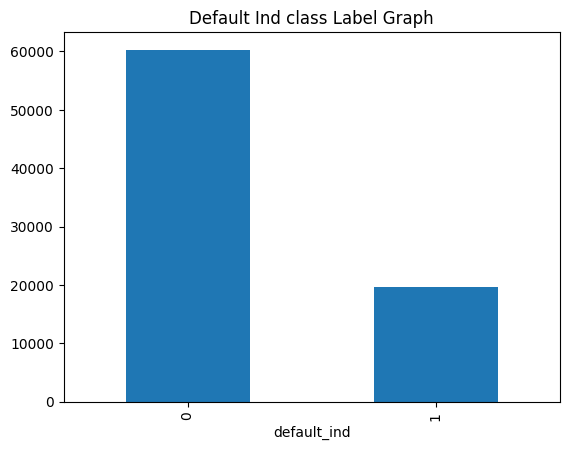

In [ ]:
label = dataset.groupby('default_ind').size()
label.plot(kind="bar")
plt.title("Default Ind class Label Graph")
plt.show()

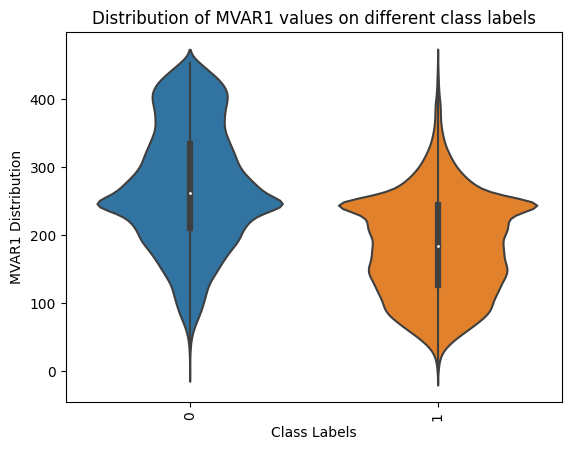

In [ ]:
plt.xticks(rotation=90)
sns.violinplot(x='default_ind',y='mvar1',data=dataset)
plt.title("Distribution of MVAR1 values on different class labels")
plt.xlabel("Class Labels")
plt.ylabel("MVAR1 Distribution")
plt.show()

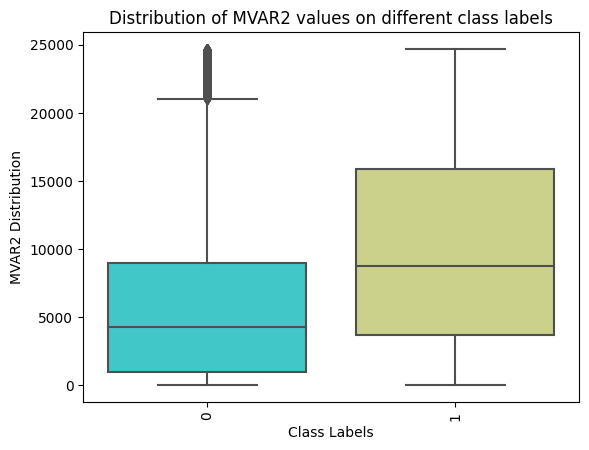

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(x='default_ind',y='mvar2',data=dataset,palette='rainbow')
plt.title("Distribution of MVAR2 values on different class labels")
plt.xlabel("Class Labels")
plt.ylabel("MVAR2 Distribution")
plt.show()

----------------------------------------------------

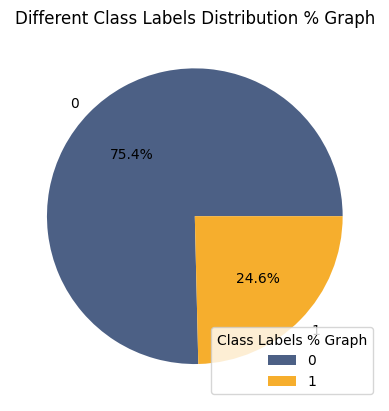

In [ ]:
plt.pie(dataset['default_ind'].value_counts(),labels=['0','1'],autopct='%1.1f%%',colors=['#4C6085','#F6AE2D'])
plt.legend(title = "Class Labels % Graph")
plt.title("Different Class Labels Distribution % Graph")
plt.show()

In [ ]:
X = dataset.drop('default_ind', axis=1)
y = dataset['default_ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print("Total Records Found in Dataset : "+str(X.shape[0]))
print("80% records used to train algorithms : "+str(X_train.shape[0]))
print("20% test records used to TEST : "+str(X_test.shape[0]))

Total Records Found in Dataset : 80000
80% records used to train algorithms : 64000
20% test records used to forecast Prices : 16000


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
accuracy = []
precision = []
recall = []
fscore = []

In [ ]:
def calculateMetrics(predict, y_test, algorithm):
    p = precision_score(y_test, predict,average='macro') * 100
    r = recall_score(y_test, predict,average='macro') * 100
    f = f1_score(y_test, predict,average='macro') * 100
    a = accuracy_score(y_test,predict)*100  
    conf_matrix = confusion_matrix(y_test, predict) 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print()
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FScore      : '+str(f)+"\n")
    
    labels = ['0', '1']
    plt.figure(figsize =(6, 4)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()


Logistic Regression Accuracy    : 79.93124999999999
Logistic Regression Precision   : 74.02996144459408
Logistic Regression Recall      : 66.89457446374732
Logistic Regression FScore      : 68.90037981597604



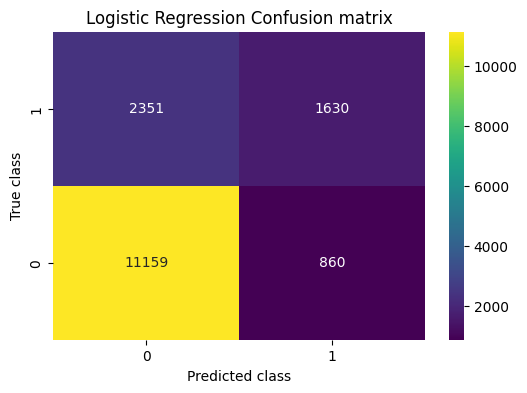

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)#train on training data
predict = lr.predict(X_test)#perfrom prediction on test data
calculateMetrics(predict, y_test, "Logistic Regression")

In [ ]:
from sklearn.model_selection import cross_val_score

# Fit the LogisticRegressionClassifier using cross-validation
clf = LogisticRegression(random_state=42)
scores = cross_val_score(clf, X, y, cv=5)

# Print the average performance across all folds
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Cross-validation scores: [0.7793125 0.773875  0.7730625 0.7699375 0.7675625]
Average score: 0.77275


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Gradient Boosting Classifier Accuracy    : 80.72500000000001
Gradient Boosting Classifier Precision   : 75.49515835350607
Gradient Boosting Classifier Recall      : 68.03607383846045
Gradient Boosting Classifier FScore      : 70.19568144218498



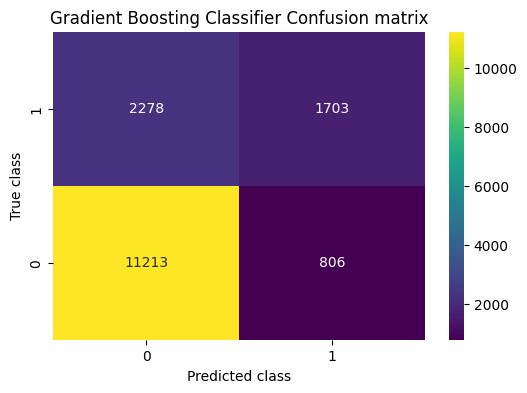

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)#train on training data
predict = gbc.predict(X_test)#perfrom prediction on test data
calculateMetrics(predict, y_test, "Gradient Boosting Classifier")

In [ ]:
from sklearn.model_selection import cross_val_score

# Fit the GradientBoostingClassifier using cross-validation
clf = GradientBoostingClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5)

# Print the average performance across all folds
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.7538125 0.6908125 0.7608125 0.7178125 0.2463125]
Average score: 0.6339125



SVM Accuracy    : 79.9125
SVM Precision   : 74.52345895360747
SVM Recall      : 65.87414480367568
SVM FScore      : 67.98510699849894



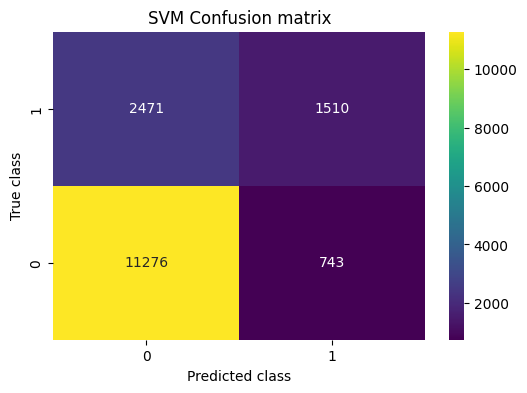

In [ ]:
svm_cls = SVC()
svm_cls.fit(X_train,y_train)
predict = svm_cls.predict(X_test)
calculateMetrics(predict, y_test, "SVM")

In [ ]:
from sklearn.model_selection import cross_val_score

# Fit the SVM using cross-validation
clf = SVC(random_state=42)
scores = cross_val_score(clf, X, y, cv=5)

# Print the average performance across all folds
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.754375  0.760375  0.763     0.760375  0.7639375]
Average score: 0.7604124999999999



Random Forest Accuracy    : 80.34375
Random Forest Precision   : 75.19360743452548
Random Forest Recall      : 66.78275912422762
Random Forest FScore      : 68.96930823467548



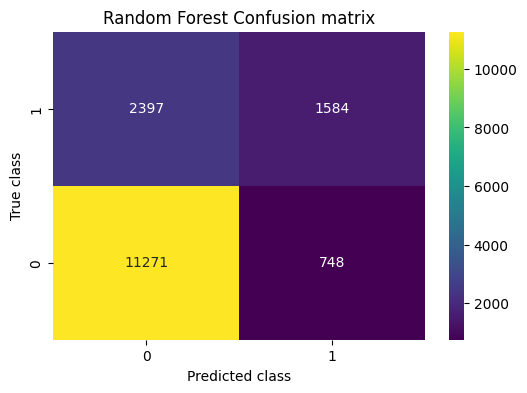

In [ ]:
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train,y_train)#train on training data
predict = rf_cls.predict(X_test)#perfrom prediction on test data
calculateMetrics(predict, y_test, "Random Forest")

In [ ]:
from sklearn.model_selection import cross_val_score

# Fit the RandomForestClassifier using cross-validation
clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5)

# Print the average performance across all folds
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.755375  0.80425   0.7998125 0.801875  0.3806875]
Average score: 0.7084


<ipython-input-22-07c37fece163>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df.pivot("Algorithms", "Accuracy", "Value").plot(kind='bar')


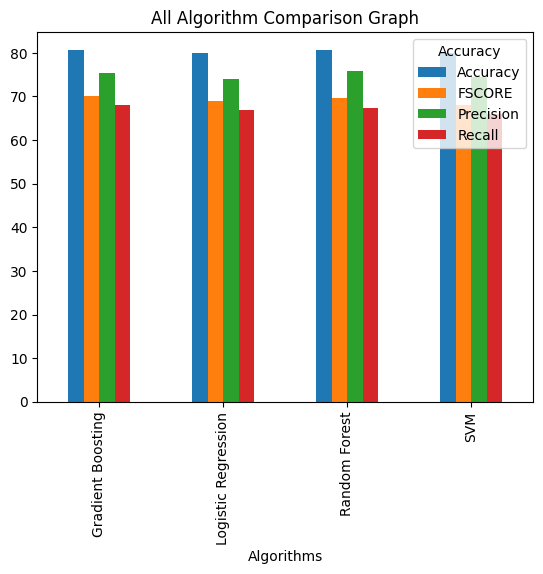

In [ ]:
df = pd.DataFrame([['Logistic Regression','Accuracy',accuracy[0]],['Logistic Regression','Precision',precision[0]],['Logistic Regression','Recall',recall[0]],['Logistic Regression','FSCORE',fscore[0]],
                   ['Gradient Boosting','Accuracy',accuracy[1]],['Gradient Boosting','Precision',precision[1]],['Gradient Boosting','Recall',recall[1]],['Gradient Boosting','FSCORE',fscore[1]],
                   ['SVM','Accuracy',accuracy[2]],['SVM','Precision',precision[2]],['SVM','Recall',recall[2]],['SVM','FSCORE',fscore[2]],
                   ['Random Forest','Accuracy',accuracy[3]],['Random Forest','Precision',precision[3]],['Random Forest','Recall',recall[3]],['Random Forest','FSCORE',fscore[3]],
                  ],columns=['Algorithms','Accuracy','Value'])
df.pivot("Algorithms", "Accuracy", "Value").plot(kind='bar')
plt.rcParams["figure.figsize"]= [8,5]
plt.title("All Algorithm Comparison Graph")
plt.show()

In [ ]:
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Logistic Regression", "Gradient Boosting", "SVM", "Random Forest"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,Logistic Regression,74.029961,66.894574,68.900380,79.93125
1,Gradient Boosting,75.495158,68.036074,70.195681,80.72500
2,SVM,74.523459,65.874145,67.985107,79.91250
3,Random Forest,75.835041,67.313948,69.573718,80.68750
